# Loading the dataset

In [38]:
import pandas as pd

# Load your dataset ')
data = pd.read_csv('bihar.csv')

# Transpose the dataset to make days as rows and time intervals as columns
data = data.T

# Set the first row as column names
data.rows = data.iloc[0]
data = data[1:]

# Convert the date index to datetime objects
data.index = pd.to_datetime(data.index)

# Resample the data to daily frequency and sum the power consumption for each day
daily_data = data.resample('D').sum()

# Visualize the first few rows of the preprocessed data
data[0]


<ipython-input-38-36e2674a8843>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.rows = data.iloc[0]


2023-04-13    0.06
2023-04-14    0.06
2023-04-15    0.06
2023-04-16    0.13
2023-04-17    3.26
2023-04-18    0.32
2023-04-19    3.26
2023-04-20    2.24
2023-04-21    3.65
2023-04-22    1.73
2023-04-23    6.21
2023-04-24    1.02
2023-04-25    2.05
2023-04-26    0.45
2023-04-27    5.70
2023-04-28    0.38
2023-04-29    5.70
2023-04-30    4.99
2023-05-01    3.90
2023-05-02    3.71
2023-05-03    3.33
2023-05-04    1.09
2023-05-05    4.99
2023-05-06    4.93
2023-05-07    0.38
2023-05-08    3.14
2023-05-09    8.51
2023-05-10    0.70
2023-05-11    2.62
2023-05-12    1.47
2023-05-13    1.15
2023-05-14    2.82
2023-05-15    0.32
2023-05-16    3.58
2023-05-17    0.45
2023-05-18    0.32
2023-05-19    4.74
2023-05-20    2.24
2023-05-21    2.94
2023-05-22    4.99
2023-05-23    1.92
2023-05-24    0.51
2023-05-25    2.88
2023-05-26    4.80
2023-05-27    4.54
2023-05-28    2.50
2023-05-29    3.52
2023-05-30    1.28
2023-05-31    0.58
2023-06-01    5.44
2023-06-02    6.46
2023-06-03    7.30
2023-06-04  

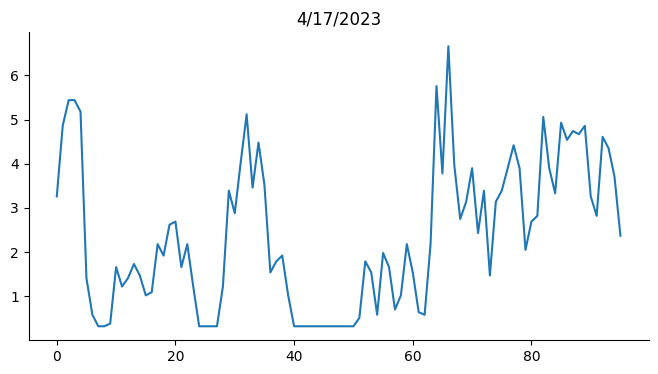

In [32]:
from matplotlib import pyplot as plt
data['4/17/2023'].plot(kind='line', figsize=(8, 4), title='4/17/2023')
plt.gca().spines[['top', 'right']].set_visible(False)

# Model Selection and Training

In [34]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Create and fit the VAR model
model = VAR(daily_data)
model_fit = model.fit()

# Specify the number of steps ahead for forecasting
steps = len(daily_data)  # Forecast for the entire length of the dataset

# Make forecasts
forecasted_values = model_fit.forecast(y=daily_data.values[-model_fit.k_ar:], steps=steps)

forecasted_values


ValueError: ignored

# Model Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error

mae_scores = {}
for i, column in enumerate(daily_data.columns):
    true_values = daily_data[column].values[-steps:]
    forecasted = forecasted_values[:, i]
    mae = mean_absolute_error(true_values, forecasted)
    mae_scores[column] = mae
    print(f"MAE for {column}: {mae}")



ValueError: ignored

#  Prediction

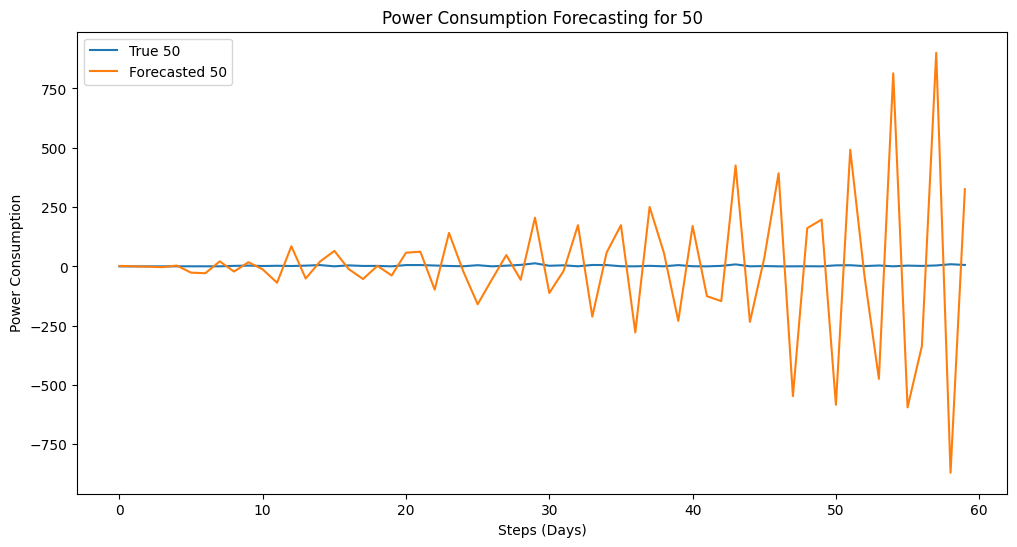

In [40]:
variable_to_plot = 50
plt.figure(figsize=(12, 6))
true_values = daily_data[variable_to_plot].values[-steps:]
forecasted = forecasted_values[-steps:, daily_data.columns.get_loc(variable_to_plot)]
plt.plot(true_values, label=f"True {variable_to_plot}")
plt.plot(forecasted, label=f"Forecasted {variable_to_plot}")
plt.legend()
plt.title(f"Power Consumption Forecasting for {variable_to_plot}")
plt.xlabel("Steps (Days)")
plt.ylabel("Power Consumption")
plt.show()
